# Step01b: Exploratory Data Analysis (EDA)
This notebook contains the definition of categorical variables in the prediciton of Mad Max's pitches to inlcude zone, pitch type, and speed.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
madmax = pd.read_csv('../data/processed/madmax_cleaned.csv', index_col=0)

In [3]:
madmax;

## Let's reorganize the dataframe to make it a bit easier to manipulate

In [4]:
madmax.columns

Index(['pitch_type', 'game_date', 'batter', 'release_speed', 'zone', 'stand',
       'home_team', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'sv_id', 'release_spin_rate', 'pitch_number', 'opp_score', 'nats_score',
       'if_fielding_alignment', 'of_fielding_alignment', 'nats_home1_away0',
       'balls_strikes', 'all_runners'],
      dtype='object')

## There are two options for representing runners on base:
- Option 1: As three discreet columns
- Option 2: As one, combined value
- Initial EDA will investigate Option 2

In [5]:
### Uses discreet columns for runners on 1st, 2nd, and 3rd
new_order1 = ['game_date', 'sv_id', 'zone', 'pitch_type', 'release_speed', 'nats_home1_away0',
              'opp_score', 'nats_score', 'pitch_number', 'stand', 'balls_strikes', 'outs_when_up','inning',
              'on_3b', 'on_2b', 'on_1b', 'if_fielding_alignment', 'of_fielding_alignment']

### Combines runners on 1st, 2nd, and 3rd into one column
new_order2 = ['game_date', 'sv_id', 'zone', 'pitch_type', 'release_speed', 'nats_home1_away0', 
              'opp_score', 'nats_score', 'pitch_number', 'stand', 'balls_strikes', 'outs_when_up','inning', 
              'all_runners', 'if_fielding_alignment', 'of_fielding_alignment']

In [6]:
### Sets madmax columns to value and order as defined in new_order2
madmax = madmax[['game_date', 'sv_id', 'zone', 'pitch_type', 'release_speed', 'nats_home1_away0', 
              'opp_score', 'nats_score', 'pitch_number', 'stand', 'balls_strikes', 'outs_when_up','inning', 
              'all_runners', 'if_fielding_alignment', 'of_fielding_alignment']]

In [7]:
madmax = madmax.sort_values(by='sv_id')
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 100)

In [8]:
madmax

,game_date,sv_id,zone,pitch_type,release_speed,nats_home1_away0,opp_score,nats_score,pitch_number,stand,balls_strikes,outs_when_up,inning,all_runners,if_fielding_alignment,of_fielding_alignment
2769,2019-03-28,190328_170717,6.0,FF,93.7,1,0,0,1,L,0_0,0,1,fb:0_sb:0_tb:0,Infield shift,Standard
2768,2019-03-28,190328_170732,5.0,FF,94.2,1,0,0,2,L,0_1,0,1,fb:0_sb:0_tb:0,Infield shift,Standard
2767,2019-03-28,190328_170752,5.0,FF,96.3,1,0,0,3,L,0_2,0,1,fb:0_sb:0_tb:0,Infield shift,Standard
2766,2019-03-28,190328_170825,6.0,SL,85.6,1,0,0,1,R,0_0,1,1,fb:0_sb:0_tb:0,Infield shift,Standard
2765,2019-03-28,190328_170842,12.0,FF,95.5,1,0,0,2,R,0_1,1,1,fb:0_sb:0_tb:0,Infield shift,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-09-24,190925_005705,4.0,CU,79.1,1,4,2,2,R,0_1,2,6,fb:0_sb:0_tb:0,Standard,Standard
3,2019-09-24,190925_005726,14.0,SL,84.8,1,4,2,3,R,0_2,2,6,fb:0_sb:0_tb:0,Standard,Standard
2,2019-09-24,190925_005750,8.0,FF,97.4,1,4,2,4,R,1_2,2,6,fb:0_sb:0_tb:0,Standard,Standard
1,2019-09-24,190925_005823,9.0,CH,84.4,1,4,2,5,R,1_2,2,6,fb:0_sb:0_tb:0,Standard,Standard


## Let's investigate our target variables
- zone
- pitch_type
- release_speed

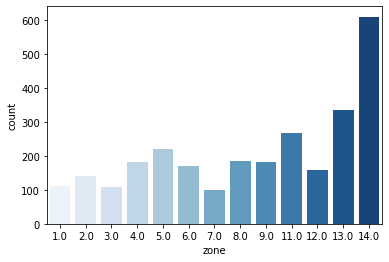

In [9]:
### Max throws more to zone 14 and 13 than he does zones 1, 3, and 7\

zone_count = sns.countplot(x='zone', 
              data=madmax, 
              palette='Blues');

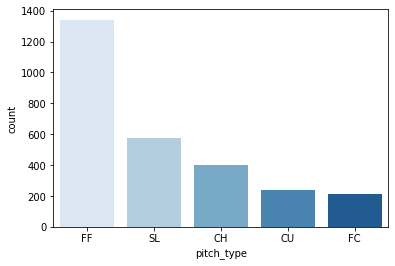

In [10]:
### Max's dominant pitch is the four-seam fastball
sns.countplot(x='pitch_type', data=madmax, palette='Blues', order=['FF', 'SL', 'CH', 'CU', 'FC']);

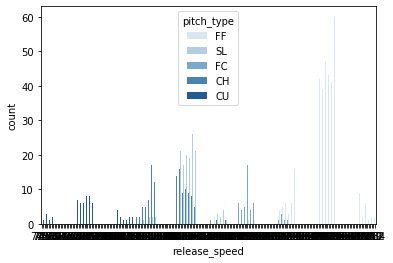

In [11]:
sns.countplot(x='release_speed', data=madmax, palette='Blues', hue='pitch_type');

### It is assumed, there will be different peaks relating to Max's different pitches.  For example the change up is intended to look like a fast ball but travel slower to the plate.  Different pitch types will travel at different speeds.